# Libreta Clase de Deep Reinforcement Learning
*Por Roberto-Esteban López-Díaz*

## Objetivos de esta libreta
- Introducir a los entornos de OpenAI Gym
- Realizar objetos a partir de objetos abstractos para interactuar con los entornos


In [ ]:
### EJECUTAR SOLO UNA VEZ ###
!pip install gif
!git clone https://github.com/Bobobert/RL_Toy
!pip install /content/RL_Toy/

In [ ]:
### EJECUTAR SOLO UNA VEZ ###
### SOLO NECESARIA EN COLAB ###
# Colab virtualDisplay for gym Environments
# This may not be necesary outside google colab
!sudo apt update
!apt install python-opengl
!apt install ffmpeg
!sudo apt-get install xvfb
!pip3 install pyvirtualdisplay

In [3]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1280, 720))
virtual_display.start()

In [4]:
from abc import ABC
from gym import make
from RL_Toy.utils import render, runEnv

## Entornos de OpenAI Gym

*con extractos de https://gym.openai.com/docs/*

Con la meta de estandarizar los entornos para los problemas de aprendizaje por refuerzo. El grupo de investigación OpenAI desarollo la interfaz de **gym** para python. Esta API ya viene disponible como paquetería para instalar en python desde *pip* o su mismo *git*. Tiene incluido consigo no solo las herramientas, objetos que forman la API diseñada para interactuar con los algoritmos. También algunos entornos ya diseñados e integrados en la misma.

Los entornos disponibles se pueden encontrar en la misma. Se pueden generar con la función de **make**, a la cual solo en necesario darle el nombre del entorno registrado por defecto. Estos se encuentran listados en *https://gym.openai.com/envs/#classic_control* pero no limitados a solo esos. En la comunidad de aprendizaje por refuerzo se ve como buena práctica el uso de esta API para el diseño de entornos, y algunos llegan a publicarse en *git's* de terceros. Estos se pueden descargar e importar de la misma manera después de registrarlos.

In [21]:
env = make("Pendulum-v0")

In [22]:
obs = env.reset()

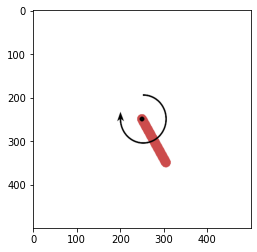

In [23]:
render(env)

In [29]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

In [30]:
env.observation_space

Box(-8.0, 8.0, (3,), float32)

In [26]:
env.step([1.0])

(array([-0.88861675, -0.45865049, -0.52031158]), -6.975409314260673, False, {})

In [15]:
(obs, reward, done, info) = env.step(AGENT.ACTION)

In [19]:
print("Observation ",obs, ".Reward: ", reward, "Is terminal?", done)

Observation  [-0.03254638  0.01839565 -0.02730811 -0.02180757] .Reward:  1.0 Is terminal? False


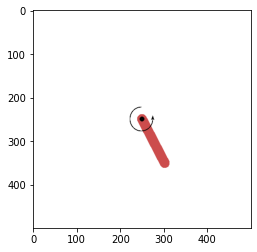

In [43]:
render(env)

## ATENCIÓN
Agregue esta celda después de la clase, olvide que tenía lista esta funcion para estudiar un poco más a fondo alguno de estos entornos. Funciona como se presenta a continuación.

La función runEnv solo hace "trayectorias" con una "política" aleatoria, y produce un .gif para que se pueda apreciar un tanto la dinámica del entorno. Es relevante jugar un poco con los entornos antes de ponerlos en un algoritmo de RL, para hacer sentido de que esperamos solucionar y poder evaluar la calidad de nuestras soluciones.

De igual manera, la función tiene el segundo objetivo de dar un valor esperado de la **ganancia** dada una *política* aleatoria.

Mean accumulate Reward -741.75, episodes 2


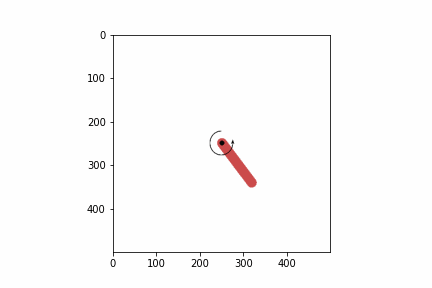

In [44]:
# Ahora toca interactuar con el entorno
runEnv(env, steps = 200)

## Objetos Abstractos e interfaces

En esta parte se presenta de manera breve que son los entornos e intefaces en python, esto con la finalidad de auxiliar en las tareas de aprendizaje por refuerzo y otra tareas en las que se puedan requerir.

En el contexto actual, se le puede denominar *Entorno* a un **objeto** con métodos y propiedades que permiten la interacción de un programa o usuario con el modelo o simulador del problema a tratar. En la práctica, estos objetos son interfaces a un simulador que puede estar escrito en un distinto lenguaje de programación.

## Entornos y clases base
Las siguientes son ejemplos de clases base para comenzar a crear un entorno de interés en el lenguaje de programacion de Python. Hacer estos no es estrictamente necesario, pero sirven como base para los métodos que todos los entornos necesitan tener para que las funciones escritas en base a estas clases funcionen sin problema. Algunos de estos estan basados en la interfaz de gym.

Diseñar entornos se puede hacer con una mentalidad desconectada a usar algoritmos de aprendizaje por refuerzo, el objetivo es representar lo más fiel y práctico el fénomeno a estudiar. Como segunda meta, es adaptar este modelo o simulación del fenomeno con estas clases para generar una interfaz (también conocidas como API). Esto con la finalidad que diferentes algoritmos, personas o entornos diseñados alrededor de la API sufran pocos o ningún cambio para funcionar entre si. Este ultimo siendo el más importante para diseñar algoritmos que funcionen con la mayoría de entornos, buscando ser generales. 


En python se pueden declarar objetos abstractos para generar una idea o estructura de aquellos que serán más particulares. Esta práctica es buena para visualizar el diseño de métodos entre los distintos objetos, las funciones y métodos que puedan ser necesarios dependiendo de nuestras necesidades y/o las del problema.

In [31]:
class Environment(ABC):
    """
    Environment base class.
    """
    def step(self, action):
        """
        Executes the action, updates the environment, calculates 
        the reward and observation output.
        Returns
        -------
        observation, reward, done
        """
        raise NotImplementedError
    def reset(self):
        """
        Restart the initial state of the environment, 
        in a deterministic or stochastic manner
        Returns
        ------
        obeservation
        """
        raise NotImplementedError
    def getObservation(self):
        """
        Calculates and returns the observation of 
        the actual state of the environment.
        """
        raise NotImplementedError
    def calculateReward(self, state):
        """
        Calculate with the actual mode the reward 
        from the last observation made in the environment
        Returns
        -------
        reward
        """
        raise NotImplementedError
    @property
    def actionSpace(self):
        """
        Returns the ActionShape class designed of the environment.
        """
        raise NotImplementedError
    @property
    def observationSpace(self):
        """
        Returns a list or generator of all the states availables. 
        """
        raise NotImplementedError
    def transProb(self, state, action):
        """
        Returns the probabilities and states of the transitions from RL_Toy.the
        state and action given.
        """
        raise NotImplementedError
    def isTerminal(self, state):
        """
        Returns the bool that expreses if 
        the actual state is a terminal one
        or not.
        """
        raise NotImplementedError

class Policy(ABC):
    """
    Policy base class.
    """

    test = False
    greedy = False
    _eps_ = 0.0
    
    def getAction(self, state):
        """
        Calculates and returns the corresponding 
        action for the state given.
        """
        raise NotImplementedError

    def update(self, state, action):
        """
        Update the action per state manner of the policy
        """
        raise NotImplementedError
    
    @property
    def epsilon(self):
        return self._eps_
    
    @epsilon.setter
    def epsilon(self, X):
        if (X >= 0) and (X <= 1):
            self._eps_ = X
        else:
            print("Invalid Epsilon, remain the same {}".format(self._eps_))


In [32]:
# A partir del Objeto Policy, nos toca diseñar una politica que interacture
# con el entorno generado antes
import random
class RANDOM(Policy):
    def getAction(self, state):
        return random.randint(0,2)

In [46]:
pi = RANDOM()

In [47]:
pi.getAction(obs)

1

In [48]:
pi.epsilon

0.0

In [49]:
pi.epsilon = 2.0

Invalid Epsilon, remain the same 0.0


In [50]:
pi.epsilon = 0.5

In [51]:
pi.epsilon

0.5